In [1]:
## import statements ##
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('databaru.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9326 entries, 0 to 9325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      9322 non-null   object
 1   polarity  9326 non-null   object
dtypes: object(2)
memory usage: 145.8+ KB


In [4]:
df.head()

,body,polarity
0,"Currently, a user has to open the Chat action ...",positive
1,"""Prevent Unauthorized Transactions in your dem...",positive
2,"The world's number one cryptocurrency, bitcoin...",positive
3,"ADEN, Aug 23 (Reuters) - Yemen will receive ab...",negative
4,"With the ASPI surging past the 8,000 mark for ...",positive


In [5]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


body        4
polarity    0
dtype: int64

In [6]:
df.dropna(subset=None, inplace = True) 

In [7]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


body        0
polarity    0
dtype: int64

In [8]:
print(f"Is there any duplicated rows? \n{df.duplicated().any()}") #melihat duplikat dari data
print(f"\nHow many? \n{df.duplicated().sum()} rows")

Is there any duplicated rows? 
True

How many? 
126 rows


In [9]:
df.drop_duplicates(subset=None, keep='first', inplace = True, ignore_index=False) #menghaopus data duplikat

In [10]:
df.head()

,body,polarity
0,"Currently, a user has to open the Chat action ...",positive
1,"""Prevent Unauthorized Transactions in your dem...",positive
2,"The world's number one cryptocurrency, bitcoin...",positive
3,"ADEN, Aug 23 (Reuters) - Yemen will receive ab...",negative
4,"With the ASPI surging past the 8,000 mark for ...",positive


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9196 entries, 0 to 9325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      9196 non-null   object
 1   polarity  9196 non-null   object
dtypes: object(2)
memory usage: 215.5+ KB


In [12]:
import re 
import string

In [13]:
# fungsi clean digunakan membersihkan simbol atau frasa yang tidak diperlukan
def cleanNews(news):
    news = news.lower()
    news = re.sub(r'\d+', '', news) # remove digits
    news = re.sub(r'”|–|“|’', '', news) # remove digits
    news = re.sub(r'\n', '', news) # remove enter to 1 space
    news = re.sub(r'\s+', ' ', news)# remove extra spaces
    
    
    return news

# mengaplikasikan proses cleaning
df['body'] = df.body.astype(str).apply(cleanNews)

In [14]:
def remove_punct(text): #menghapus tanda baca
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

df['text_new'] = df['body'].apply(lambda x: remove_punct(x))

In [15]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in df.text_new] 

In [16]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] 

In [17]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [18]:
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

In [19]:
from nltk.stem.snowball import SnowballStemmer

In [20]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [21]:
# import nltk
# from nltk.stem.snowball import SnowballStemmer
  
# #the stemmer requires a language parameter
# snow_stemmer = SnowballStemmer(language='english')

In [22]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [23]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens] 

In [24]:
stemming = [stemming(sen) for sen in filtered_words]

In [25]:
result = [' '.join(sen) for sen in stemming ] 

In [26]:
df['Text_Final'] = result

In [27]:
df

,body,polarity,text_new,Text_Final
0,"currently, a user has to open the chat action ...",positive,currently a user has to open the chat action s...,current user open chat action sheet order send...
1,"""prevent unauthorized transactions in your dem...",positive,prevent unauthorized transactions in your dema...,prevent unauthor transact demat trade account ...
2,"the world's number one cryptocurrency, bitcoin...",positive,the worlds number one cryptocurrency bitcoin h...,world number one cryptocurr bitcoin top mark f...
3,"aden, aug (reuters) - yemen will receive about...",negative,aden aug reuters yemen will receive about mi...,aden aug reuter yemen receiv million worth res...
4,"with the aspi surging past the , mark for the ...",positive,with the aspi surging past the mark for the n...,aspi surg past mark nd time take account econo...
...,...,...,...,...
9321,quebec-based startup raised a series a to exte...,positive,quebecbased startup raised a series a to exten...,quebecbas startup rais seri extend leadership ...
9322,as per the draft red herring prospectus (drhp)...,neutral,as per the draft red herring prospectus drhp f...,per draft red her prospectu drhp file life ins...
9323,asia-pacific markets mostly gain as investors ...,positive,asiapacific markets mostly gain as investors w...,asiapacif market mostli gain investor weigh ru...
9324,"over the last couple of years, there has been ...",neutral,over the last couple of years there has been a...,last coupl year exponenti flow invest agritech...


In [28]:
df = df[['Text_Final','polarity']]

In [29]:
# Encode target labels
repl = {'neutral':0,'positive':1,'negative':2}
df['polarity'].replace(repl, inplace=True)

C:\Users\denni\AppData\Local\Temp\ipykernel_5368\3367682685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'].replace(repl, inplace=True)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df['Text_Final']
y = df['polarity']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=42)

In [33]:
train_data = {'text' : X_train,
              'label': y_train}

test_data  = {'text' : X_test,
              'label': y_test}

In [34]:
train_df = pd.DataFrame(train_data)
test_df  = pd.DataFrame(test_data)

In [35]:
train = train_df
test = test_df

In [36]:
train

,text,label
5655,agreena danish startup mint verifi sell carbon...,1
5663,amsterdambas tech startup theydo platform prov...,1
8673,igor nikushinshutterstockimagin your read murd...,1
6243,radiolog ai startup qureai close mn fund round...,1
5993,londonbas gravitiq healthcar brand aggreg foun...,1
...,...,...
5834,octob dutch author consum market acm found tec...,2
5291,give crap ceo simon griffith among group start...,1
5490,welcom ignit lane weekli wrap cut nois bring f...,1
922,shanghai china stock mix thursday investor tur...,2


In [37]:
y_train = train['label'].tolist()

In [38]:
import codecs
from tqdm import tqdm
import numpy as np

In [39]:
print('\n=============================')
print(' > Loading Word Embeddings > ')
print('=============================')

embeddings_index = {}

f = codecs.open(r"C:\Users\denni\Documents\Kerja\crawl-300d-2M.vec\crawl-300d-2M.vec", encoding='utf-8')

for line in tqdm(f):
  values = line.rstrip().rsplit(' ')
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close()

print('\n\nNumber of Word Vectors : ', len(embeddings_index))
print('Number of Train Data   : ', train.shape[0])
print('Number of Test Data    : ', test.shape[0])


 > Loading Word Embeddings > 


1999996it [02:34, 12908.38it/s]



Number of Word Vectors :  1999996
Number of Train Data   :  6437
Number of Test Data    :  2759


In [40]:
label_names = ['neutral', 'positive','negative']

train['doc_len'] = train['text'].apply(lambda words: len(words.split(' ')))

max_seq_len = np.max(train['doc_len'])+1

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [42]:
raw_docs_train = train['text'].tolist()
raw_docs_test  = test['text'].tolist()


MAX_NB_WORDS = 10000
num_classes = len(label_names)

print('=============================')
print(' >> Tokenizing Input Data >> ')
print('=============================')

tokenizer = Tokenizer(num_words=MAX_NB_WORDS,
                      lower=True,
                      char_level=False)
tokenizer.fit_on_texts(raw_docs_train + raw_docs_test)


word_seq_train = tokenizer.texts_to_sequences(raw_docs_train)
word_seq_test  = tokenizer.texts_to_sequences(raw_docs_test)

word_index = tokenizer.word_index

print('Dictionary Size: ', len(word_index))

word_seq_train = sequence.pad_sequences(word_seq_train, maxlen = max_seq_len)
word_seq_test  = sequence.pad_sequences(word_seq_test, maxlen = max_seq_len)

 >> Tokenizing Input Data >> 
Dictionary Size:  132789


In [43]:
batch_size  = 32
num_epochs  = 200

embed_dim   = 300
num_filters = 64

In [44]:
print('==================================')
print(' >> Preparing Embedding Matrix >> ')
print('==================================')

words_not_found = []

nb_words = min(MAX_NB_WORDS, len(word_index))

embedding_matrix = np.zeros((nb_words+1, embed_dim))

for word, i in word_index.items():
  if i >= nb_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if (embedding_vector is not None) and len(embedding_vector) > 0:
    embedding_matrix[i] = embedding_vector
  else:
    words_not_found.append(word)

print('Number of Null Word Embeddings : %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))
print("Sample Words Not Found         :", np.random.choice(words_not_found, 5))

 >> Preparing Embedding Matrix >> 
Number of Null Word Embeddings : 2432
Sample Words Not Found         : ['wallpap' 'nonexecut' 'randomli' 'refineri' 'fastgrow']


In [45]:
print("Sample Words Not Found         :", np.random.choice(words_not_found, 3363))

Sample Words Not Found         : ['cerebra' 'eufi' 'tenabl' ... 'ogoship' 'findabl' 'wildlif']


In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
target = []

for i in train['label']:
  if i == 0:
    target.append(0)
  elif i == 1:
    target.append(1)
  elif i == 2:
    target.append(2)

train['new_label'] = target

train_labels = to_categorical(train['new_label'])

In [48]:
from keras.models import Sequential, load_model
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
# import library untuk melakukan pemodelan
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,GlobalMaxPool1D
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2

In [49]:
# model keras sequental
model = keras.models.Sequential([
    keras.layers.Embedding(nb_words+1, embed_dim,
                    weights=[embedding_matrix],
                    input_length=max_seq_len,
                    trainable=False),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.LSTM(20,activation="tanh"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [50]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4716, 300)         3000300   
                                                                 
 dropout (Dropout)           (None, 4716, 300)         0         
                                                                 
 dense (Dense)               (None, 4716, 20)          6020      
                                                                 
 dropout_1 (Dropout)         (None, 4716, 20)          0         
                                                                 
 lstm (LSTM)                 (None, 20)                3280      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 6

In [51]:
hist = model.fit(word_seq_train,
                 train_labels,
                 batch_size = batch_size,
                 epochs = num_epochs,
                 validation_split=0.2,
                 shuffle=True,
                 verbose=2)

Epoch 1/200
161/161 - 41s - loss: 0.7290 - accuracy: 0.7497 - val_loss: 0.5874 - val_accuracy: 0.7616 - 41s/epoch - 255ms/step
Epoch 2/200
161/161 - 34s - loss: 0.6014 - accuracy: 0.7753 - val_loss: 0.5648 - val_accuracy: 0.7733 - 34s/epoch - 209ms/step
Epoch 3/200
161/161 - 34s - loss: 0.5721 - accuracy: 0.7817 - val_loss: 0.5788 - val_accuracy: 0.7725 - 34s/epoch - 211ms/step
Epoch 4/200
161/161 - 34s - loss: 0.5514 - accuracy: 0.7833 - val_loss: 0.5183 - val_accuracy: 0.7780 - 34s/epoch - 213ms/step
Epoch 5/200
161/161 - 35s - loss: 0.5476 - accuracy: 0.7846 - val_loss: 0.5194 - val_accuracy: 0.7733 - 35s/epoch - 217ms/step
Epoch 6/200
161/161 - 35s - loss: 0.5272 - accuracy: 0.7862 - val_loss: 0.5111 - val_accuracy: 0.7818 - 35s/epoch - 219ms/step
Epoch 7/200
161/161 - 35s - loss: 0.5189 - accuracy: 0.7893 - val_loss: 0.5823 - val_accuracy: 0.7671 - 35s/epoch - 215ms/step
Epoch 8/200
161/161 - 34s - loss: 0.5353 - accuracy: 0.7897 - val_loss: 0.5514 - val_accuracy: 0.7244 - 34s/epo

161/161 - 36s - loss: 0.3383 - accuracy: 0.8611 - val_loss: 0.3599 - val_accuracy: 0.8447 - 36s/epoch - 224ms/step
Epoch 66/200
161/161 - 36s - loss: 0.3364 - accuracy: 0.8679 - val_loss: 0.3559 - val_accuracy: 0.8447 - 36s/epoch - 221ms/step
Epoch 67/200
161/161 - 36s - loss: 0.3431 - accuracy: 0.8578 - val_loss: 0.3375 - val_accuracy: 0.8509 - 36s/epoch - 226ms/step
Epoch 68/200
161/161 - 35s - loss: 0.3394 - accuracy: 0.8619 - val_loss: 0.3626 - val_accuracy: 0.8540 - 35s/epoch - 219ms/step
Epoch 69/200
161/161 - 34s - loss: 0.3381 - accuracy: 0.8613 - val_loss: 0.3406 - val_accuracy: 0.8540 - 34s/epoch - 212ms/step
Epoch 70/200
161/161 - 35s - loss: 0.3430 - accuracy: 0.8592 - val_loss: 0.3188 - val_accuracy: 0.8680 - 35s/epoch - 217ms/step
Epoch 71/200
161/161 - 35s - loss: 0.3362 - accuracy: 0.8600 - val_loss: 0.3564 - val_accuracy: 0.8657 - 35s/epoch - 215ms/step
Epoch 72/200
161/161 - 35s - loss: 0.3330 - accuracy: 0.8633 - val_loss: 0.3575 - val_accuracy: 0.8478 - 35s/epoch - 

Epoch 129/200
161/161 - 34s - loss: 0.3164 - accuracy: 0.8687 - val_loss: 0.3258 - val_accuracy: 0.8649 - 34s/epoch - 209ms/step
Epoch 130/200
161/161 - 35s - loss: 0.3208 - accuracy: 0.8701 - val_loss: 0.3187 - val_accuracy: 0.8696 - 35s/epoch - 219ms/step
Epoch 131/200
161/161 - 34s - loss: 0.3117 - accuracy: 0.8734 - val_loss: 0.3269 - val_accuracy: 0.8665 - 34s/epoch - 213ms/step
Epoch 132/200
161/161 - 34s - loss: 0.3209 - accuracy: 0.8689 - val_loss: 0.3116 - val_accuracy: 0.8703 - 34s/epoch - 212ms/step
Epoch 133/200
161/161 - 34s - loss: 0.3097 - accuracy: 0.8792 - val_loss: 0.3211 - val_accuracy: 0.8711 - 34s/epoch - 212ms/step
Epoch 134/200
161/161 - 34s - loss: 0.3140 - accuracy: 0.8703 - val_loss: 0.3564 - val_accuracy: 0.8641 - 34s/epoch - 209ms/step
Epoch 135/200
161/161 - 34s - loss: 0.3249 - accuracy: 0.8675 - val_loss: 0.3074 - val_accuracy: 0.8734 - 34s/epoch - 212ms/step
Epoch 136/200
161/161 - 34s - loss: 0.3100 - accuracy: 0.8726 - val_loss: 0.3100 - val_accuracy: 

Epoch 193/200
161/161 - 36s - loss: 0.2950 - accuracy: 0.8819 - val_loss: 0.3140 - val_accuracy: 0.8657 - 36s/epoch - 222ms/step
Epoch 194/200
161/161 - 36s - loss: 0.3036 - accuracy: 0.8757 - val_loss: 0.3207 - val_accuracy: 0.8672 - 36s/epoch - 222ms/step
Epoch 195/200
161/161 - 36s - loss: 0.3058 - accuracy: 0.8800 - val_loss: 0.3286 - val_accuracy: 0.8618 - 36s/epoch - 225ms/step
Epoch 196/200
161/161 - 36s - loss: 0.2932 - accuracy: 0.8860 - val_loss: 0.3034 - val_accuracy: 0.8719 - 36s/epoch - 225ms/step
Epoch 197/200
161/161 - 36s - loss: 0.2987 - accuracy: 0.8751 - val_loss: 0.3438 - val_accuracy: 0.8766 - 36s/epoch - 221ms/step
Epoch 198/200
161/161 - 34s - loss: 0.2992 - accuracy: 0.8825 - val_loss: 0.3205 - val_accuracy: 0.8688 - 34s/epoch - 211ms/step
Epoch 199/200
161/161 - 34s - loss: 0.3053 - accuracy: 0.8763 - val_loss: 0.3128 - val_accuracy: 0.8750 - 34s/epoch - 211ms/step
Epoch 200/200
161/161 - 35s - loss: 0.3013 - accuracy: 0.8778 - val_loss: 0.3141 - val_accuracy: 

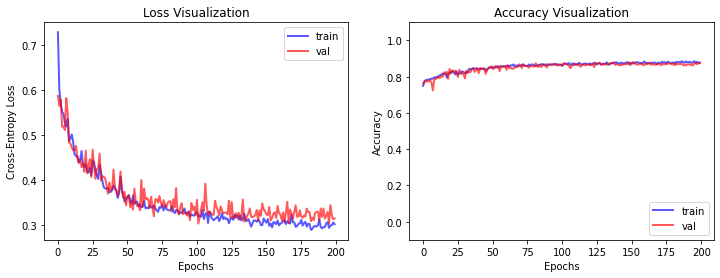

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(hist.history['loss'], lw=2.0, color='b', alpha=0.65, label='train')
ax1.plot(hist.history['val_loss'], lw=2.0, color='r', alpha=0.65, label='val')
ax1.set_title('Loss Visualization')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Cross-Entropy Loss')
ax1.legend(loc='upper right')
ax2.plot(hist.history['accuracy'], lw=2.0, color='b', alpha=0.65, label='train')
ax2.plot(hist.history['val_accuracy'], lw=2.0, color='r', alpha=0.65, label='val')
ax2.set_title('Accuracy Visualization')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

ax1.grid(False)
ax2.grid(False)

ax2.set_ylim(-0.1, 1.1)
plt.show()

In [53]:
test

,text,label
3182,santa clau ralli basic tendenc stock market su...,1
1971,compani alreadi rais billion anchor investor r...,1
2500,india consid allow crypto trade investor,0
6037,nasscom premier trade bodi chamber commerc tec...,1
8653,brainnwav found provid augment busi intellig p...,1
...,...,...
4680,account practic manag softwar compani karbon r...,1
4042,london zoomo startup design sell commerci grad...,0
7028,either log asham face stay zoom long enough be...,1
3168,analysisaft anoth stun us stock market year in...,1


In [54]:
raw_docs_test  = test['text']

word_seq_test  = tokenizer.texts_to_sequences(raw_docs_test)

word_seq_test  = sequence.pad_sequences(word_seq_test, maxlen = 4716)

In [55]:
train_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [56]:
y_pred = model.predict(word_seq_test).round()

In [57]:
pred_df = pd.DataFrame(data=y_pred)

In [58]:
y_pred = pred_df.values.argmax(1)

In [59]:
from keras.models import load_model
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
cm = confusion_matrix(y_test, y_pred)

print(cm)
print('Accuracy ' +str(accuracy_score(y_test, y_pred)))

[[ 203   35    4]
 [  92 1960   47]
 [  59  116  243]]
Accuracy 0.8720550924247916


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68       242
           1       0.93      0.93      0.93      2099
           2       0.83      0.58      0.68       418

    accuracy                           0.87      2759
   macro avg       0.78      0.78      0.76      2759
weighted avg       0.88      0.87      0.87      2759



In [62]:
# model1.save("model010.h5")
# print("Saved model to disk")

In [63]:
import os

In [64]:
model_version = "0001"
model_name = "my_mnist_model"
model_path = os.path.join(model_name, model_version)
model_path

'my_mnist_model\\0001'

In [66]:
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: my_mnist_model\0001\assets


INFO:tensorflow:Assets written to: my_mnist_model\0001\assets
